<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

![img](https://cdn-prod.medicalnewstoday.com/content/images/articles/150/150670/malaria-is-passed-on-by-the-anopheles-mosquito.jpg)

# <a id='step1'></a>
# <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 1 | <b></span><span style="color:white"><b>Python Libraries</b></span></div>

## <a id='step11'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 1.1 | <b></span><span style="color:#368F8B"><b>Import libraries</b></span></span>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <a id='step2'></a>
# <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 2 | <b></span><span style="color:white"><b>Data</b></span></div>

## <a id='step21'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.1 | <b></span><span style="color:#368F8B"><b>Import Data</b></span></span>

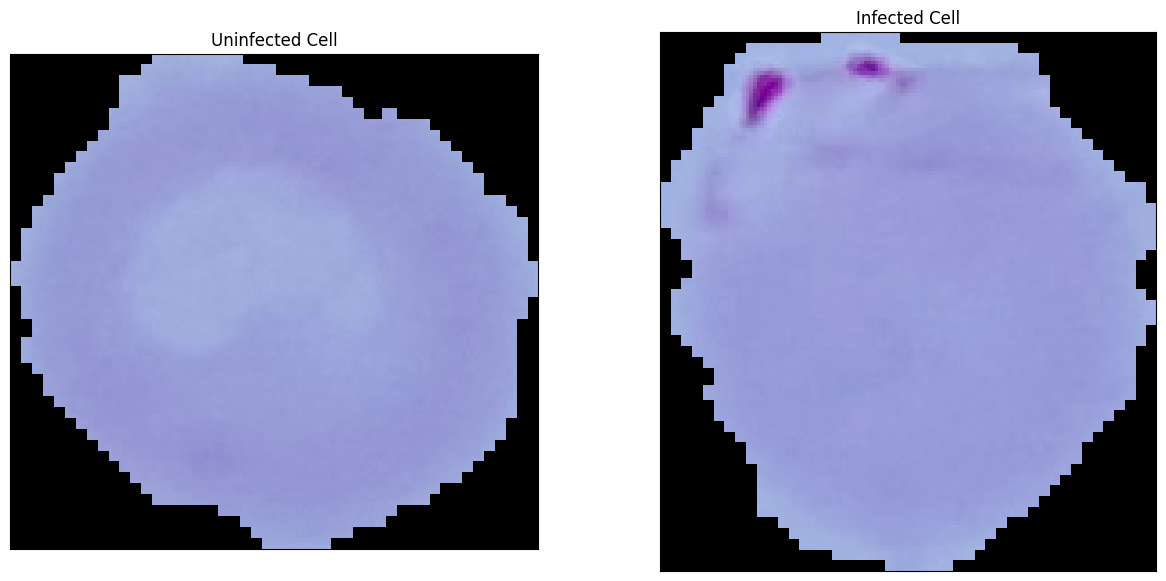

In [19]:
import cv2

upic='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()


## <a id='step22'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 2.2 | <b></span><span style="color:#368F8B"><b>Dividing Dataset into two folders train and test</b></span></span>

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [31]:
class_names = trainDatagen.class_indices.keys()
class_names

dict_keys(['Parasitized', 'Uninfected'])

# <a id='step3'></a>
# <div style="background-color:#012622;background-size: cover;font-family:tahoma;font-size:200%;text-align:center;border-radius:25px 25px 25px 25px; padding:10px; border:solid 2px #09375b"><span style="color:red"><b>Step 3 | <b></span><span style="color:white"><b>Modeling</b></span></div>

## <a id='step31'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1 | <b></span><span style="color:#368F8B"><b>Convolution Model (CNN)</b></span></span>

In [36]:
from tensorflow.keras import layers

tf.random.set_seed(42)

# Create a simple CNN model
Model_1 = tf.keras.Sequential([
  layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = [128, 128, 3]),
  layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"),
  layers.MaxPool2D(pool_size = 2, strides = 2),

  layers.Dropout(0.25),

  layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"),
  layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"),
  layers.MaxPool2D(pool_size = 2, strides = 2),

  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(units = 512, activation = "relu"),
  layers.Dense(units = 256, activation = "relu"),
  layers.Dropout(0.5),

  layers.Dense(units = 1, activation = 'sigmoid')
])
Model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
Model_1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    27,558,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,755,553 (105.88 MB)

 Trainable params: 27,755,553 (105.88 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    restore_best_weights = True
)

# fit the Model
Model_1_history = Model_1.fit(
    trainDatagen,
    epochs = 40,
    validation_data = valDatagen,
    callbacks = [early_stopping]
    )

Epoch 1/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 62s 76ms/step - accuracy: 0.5105 - loss: 0.7309 - val_accuracy: 0.5766 - val_loss: 0.6755
Epoch 2/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.6826 - loss: 0.5914 - val_accuracy: 0.9341 - val_loss: 0.2215
Epoch 3/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9444 - loss: 0.1961 - val_accuracy: 0.9341 - val_loss: 0.2176
Epoch 4/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.9481 - loss: 0.1823 - val_accuracy: 0.9454 - val_loss: 0.1772
Epoch 5/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.9550 - loss: 0.1548 - val_accuracy: 0.9425 - val_loss: 0.1838
Epoch 6/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - accuracy: 0.9544 - loss: 0.1530 - val_accuracy: 0.9483 - val_loss: 0.1727
Epoch 7/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.9631 - loss: 0.1335 - val_accuracy: 0.9479 - val_loss: 0.1885
Epoch 8/40
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.9635 - loss: 0.1220 - 

## <a id='step38'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1.1 | <b></span><span style="color:#368F8B"><b>Evaluate the Model</b></span></span>

In [39]:
# Evaluate Model
from termcolor import colored


train_loss, train_acc = Model_1.evaluate(trainDatagen)
print(colored(f'Training accuracy: {round(train_acc, 3)}', 'green', attrs=['bold']))

val_loss, val_acc = Model_1.evaluate(valDatagen)
print(colored(f'Training accuracy: {round(val_acc, 3)}', 'green', attrs=['bold']))

689/689 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.9677 - loss: 0.1091
Training accuracy: 0.966
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9497 - loss: 0.1652
Training accuracy: 0.948


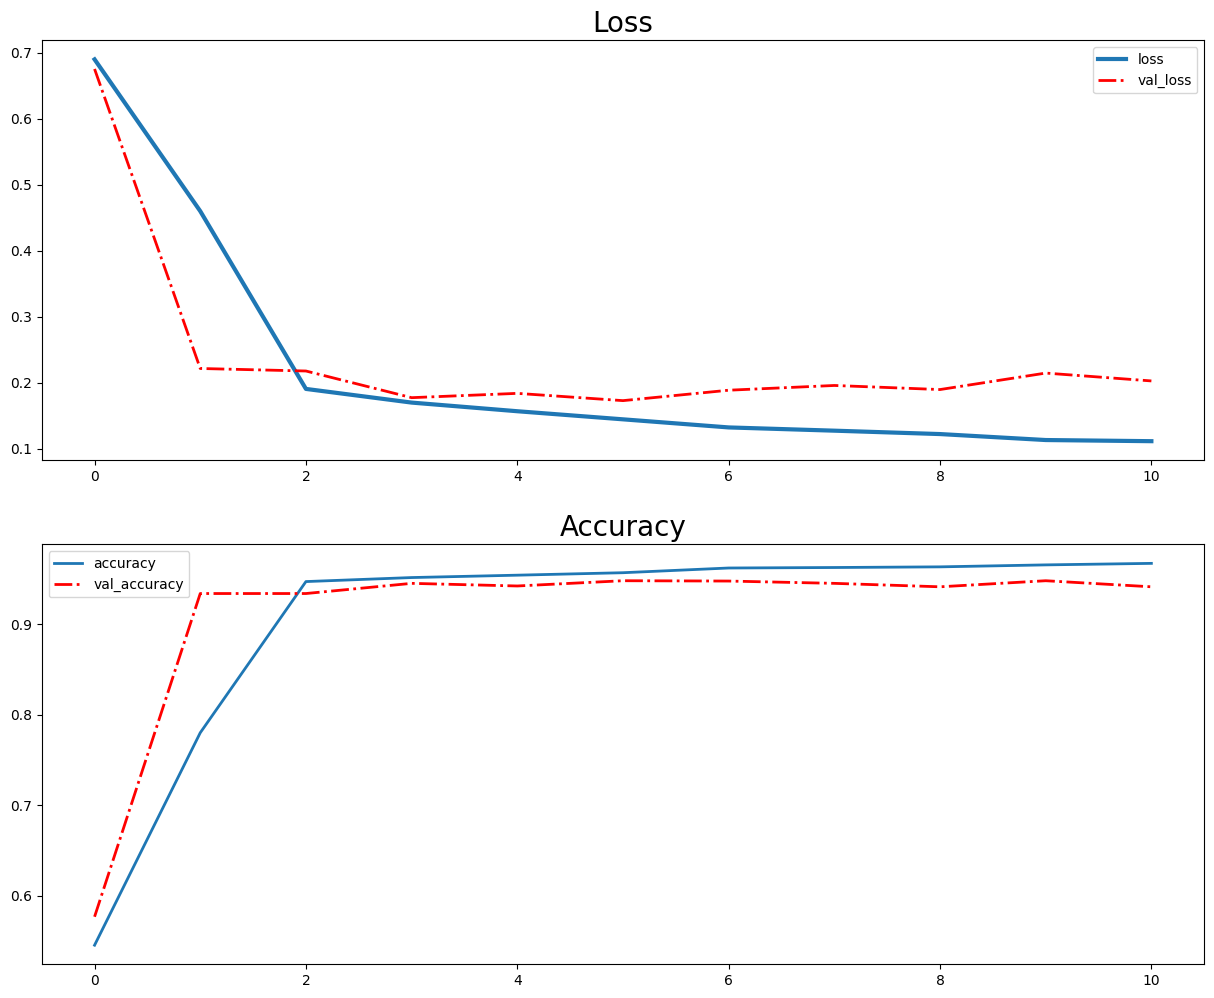

In [41]:
result_df = pd.DataFrame(Model_1_history.history)

x = np.arange(len(result_df))
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

plt.sharex = True


plt.show()

## <a id='step38'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.1.2 | <b></span><span style="color:#368F8B"><b>Making Prediction With Our Trained Model
</b></span></span>

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C176P137NThinF_IMG_20151201_121808_cell_68.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_111326_cell_23.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C223ThinF_IMG_20151112_103809_cell_173.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


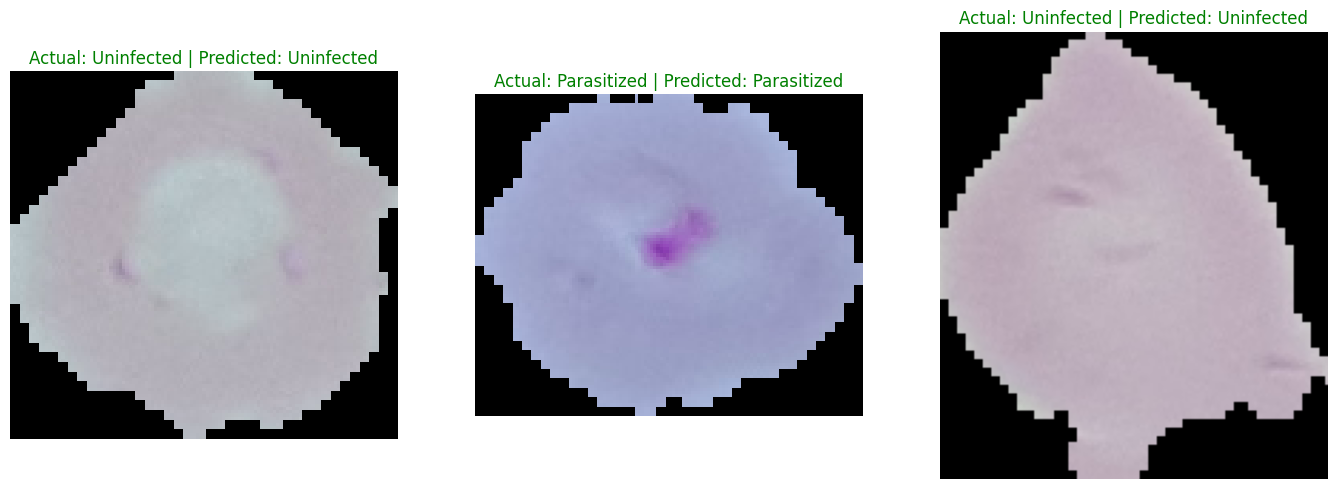

In [105]:
import matplotlib.image as mpimg

def load_and_pred_image(file_name,img_shape = 64, scale = True):
  image = tf.keras.preprocessing.image.load_img(file_name,target_size=(128,128))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.array([image])
  if scale:
    image = image/255.
  pred = Model_1.predict(image)
  result_index = int(np.round(pred))
  return list(class_names)[result_index]

test_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(list(class_names))
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  print(filepath)

  # Load and preprocess the image
  pred_image = load_and_pred_image(filepath, scale = True)

  # Plot the image
  plt.subplot(1, 3, i+1)
  plt.imshow(cv2.imread(filepath))
  if class_name == pred_image:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='green')
  else:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='red')

  plt.axis("off")

## <a id='step31'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2 | <b></span><span style="color:#368F8B"><b>Add MobileNetV2 model</b></span></span>

In [69]:
from tensorflow.keras.applications import MobileNetV2

pretrained_model = MobileNetV2(
    input_shape=(128, 128, 3),   # input image size
    include_top=False,          # model not include top layer
    weights='imagenet',         # wights type
    pooling='avg'               # type of pooling layer
)

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.1 | <b></span><span style="color:#368F8B"><b>Freeze MobileNetV2 layers</b></span></span>

In [70]:
for layer in pretrained_model.layers:
  print(layer.name)

input_layer_7
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_

In [71]:
# freeze all layers except the last layers
pretrained_model.trainable = True
set_trainable = False

for layer in pretrained_model.layers:
  if layer.name == 'block_8_add':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.2 | <b></span><span style="color:#368F8B"><b>Define the Model and Train it</b></span></span>

In [72]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Assuming `pretrained_model` is defined previously
Model_2 = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    pretrained_model,

    layers.Flatten(),

    # Add a dense layer with batch normalization
    layers.Dense(units=512, activation="relu"),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Dropout(0.5),  # Add dropout to avoid overfitting

    # Another dense layer with batch normalization
    layers.Dense(units=256, activation="relu"),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Dropout(0.5),  # Dropout layer for regularization

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
Model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Summary of the model
Model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,048,513 (11.63 MB)

 Trainable params: 2,827,777 (10.79 MB)

 Non-trainable params: 220,736 (862.25 KB)

In [73]:
# callbacks
checkpoint_path = "MyModel_2_MobileNetV2.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_best_only = True,
    save_weights_only = True,
    monitor = "val_accuracy",
    verbose = 1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    patience = 10,
    restore_best_weights = True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = "val_loss", factor = 0.5,
    patience = 3, min_lr = 1e-6
)

# train the Model
Model_2_history = Model_2.fit(
    trainDatagen,
    epochs = 40,
    validation_data = valDatagen,
    callbacks = [checkpoint_callback, early_stopping, reduce_lr],
)


Epoch 1/40
688/689 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9168 - loss: 0.2413
Epoch 1: val_accuracy improved from -inf to 0.80490, saving model to MyModel_2_MobileNetV2.weights.h5
689/689 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.9168 - loss: 0.2411 - val_accuracy: 0.8049 - val_loss: 2.4405 - learning_rate: 0.0010
Epoch 2/40
688/689 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9571 - loss: 0.1358
Epoch 2: val_accuracy improved from 0.80490 to 0.92450, saving model to MyModel_2_MobileNetV2.weights.h5
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9571 - loss: 0.1358 - val_accuracy: 0.9245 - val_loss: 1.3869 - learning_rate: 0.0010
Epoch 3/40
688/689 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9632 - loss: 0.1120
Epoch 3: val_accuracy improved from 0.92450 to 0.94465, saving model to MyModel_2_MobileNetV2.weights.h5
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9632 - loss: 0.1120 - val_accuracy: 0.9446 - val_loss: 0.9335 - learning_rate: 0.001

## <a id='step32'></a>
# <span style="font-family:tahoma;font-size:100%;text-align:left"><span style="color:red"><b>Step 3.2.3 | <b></span><span style="color:#368F8B"><b>Evaluate the MobileNetV2 Model</b></span></span>

In [74]:
# Evaluate Model
from termcolor import colored
Model_2.load_weights('/kaggle/working/MyModel_2_MobileNetV2.weights.h5')

train_loss, train_acc = Model_2.evaluate(trainDatagen)
print(colored(f'Training accuracy: {round(train_acc, 3)}', 'green', attrs=['bold']))

val_loss, val_acc = Model_2.evaluate(valDatagen)
print(colored(f'Training accuracy: {round(val_acc, 3)}', 'green', attrs=['bold']))

689/689 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.9698 - loss: 0.3434
Training accuracy: 0.97
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9548 - loss: 0.5499
Training accuracy: 0.953


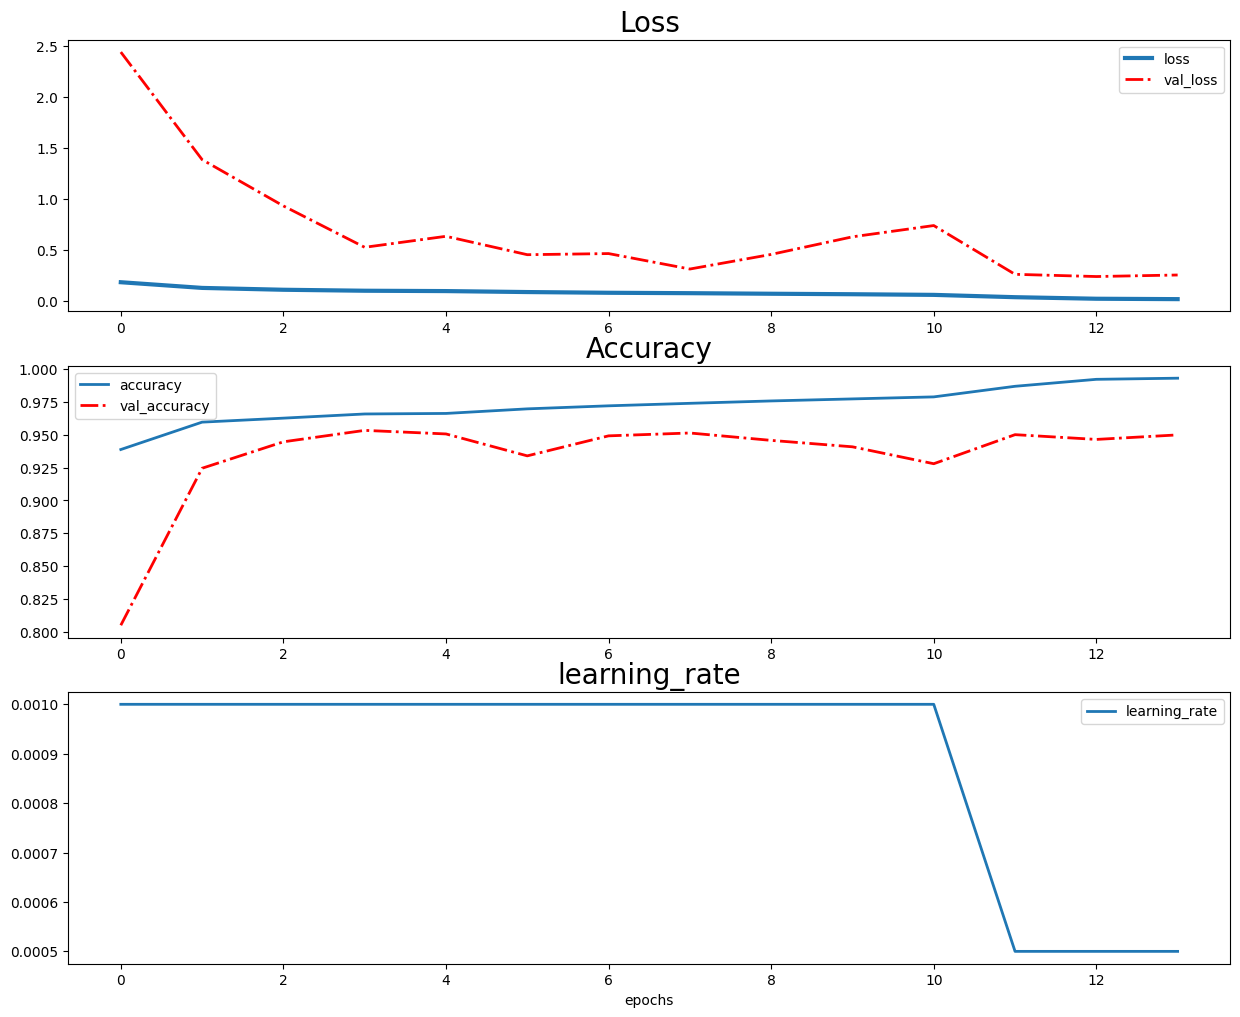

In [75]:
result_df = pd.DataFrame(Model_2_history.history)

x = np.arange(len(result_df))
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2)
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].legend()

plt.sharex = True


plt.show()

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C78P39ThinF_IMG_20150606_104936_cell_92.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C124P85ThinF_IMG_20151002_155223_cell_79.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C176P137NThinF_IMG_20151201_114235_cell_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


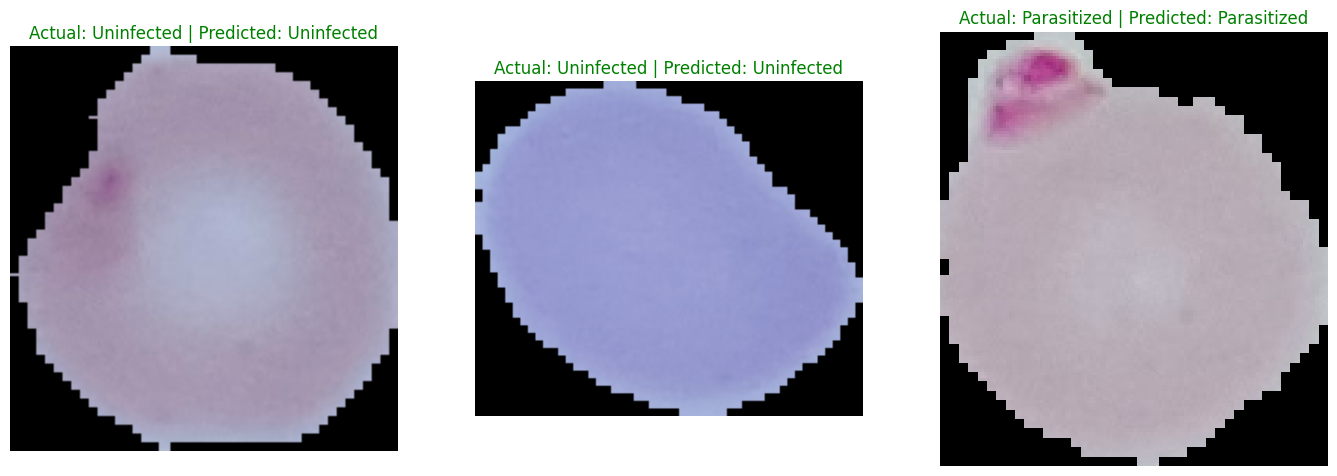

In [107]:
import matplotlib.image as mpimg

def load_and_pred_image(file_name,img_shape = 64, scale = True):
  image = tf.keras.preprocessing.image.load_img(file_name,target_size=(128,128))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.array([image])
  if scale:
    image = image/255.
  pred = Model_2.predict(image)
  result_index = int(np.round(pred))
  return list(class_names)[result_index]

test_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(list(class_names))
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  print(filepath)

  # Load and preprocess the image
  pred_image = load_and_pred_image(filepath, scale = True)

  # Plot the image
  plt.subplot(1, 3, i+1)
  plt.imshow(cv2.imread(filepath))
  if class_name == pred_image:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='green')
  else:
    plt.title(f"Actual: {class_name} | Predicted: {pred_image}", color='red')

  plt.axis("off")